<a href="https://colab.research.google.com/github/hyunjju/board/blob/master/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

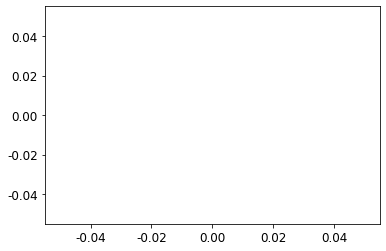

In [7]:
import matplotlib.pyplot as plt
plt.plot([])

In [8]:
import os
#현재 작업 디렉토리 
os.getcwd()

'/content'

In [7]:
#파일 업로드 화면 만들기
from google.colab import files
file_uploaded=files.upload()

KeyboardInterrupt: ignored

In [1]:
#구글 드라이브를 content 디렉토리에 drive 디렉토리로 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

#패키지를 반 영구적으로 설치
from google.colab import drive
drive.mount('/content/drive')

#심볼릭 링크 생성 
import os, sys
pg_path = '/content/packages'

os.symlink('/content/drive/My Drive/Colab Notebooks', pg_path)

sys.path.insert(0, pg_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install --target=$pg_path selenium

     |████████████████████████████████| 968 kB 5.4 MB/s 
     |████████████████████████████████| 359 kB 42.3 MB/s 
     |████████████████████████████████| 138 kB 43.8 MB/s 
     |████████████████████████████████| 3.6 MB 40.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import sys

# Scikit_learn ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd

import os
import platform


# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#한글 설정
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#음수 표현을 위한 설정
mpl.rcParams['axes.unicode_minus'] = False

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 투표 기반 분류기

In [6]:
#데이터 생성
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 직접투표 방식

In [7]:
#모델 생성 및 훈련 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀 모델 생성
log_clf = LogisticRegression(solver="lbfgs", random_state=42)

#선형 svm 모델 생성
svm_clf = SVC(gamma='scale', random_state=42)

#랜덤 포레스트 모델 생성
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

#투표 기반 분류기
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [8]:
#평가 지표 확인
from sklearn.metrics import accuracy_score

for clf in(log_clf, svm_clf, rnd_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
SVC 0.896
RandomForestClassifier 0.896
VotingClassifier 0.912


### 간접 회귀 방식

In [21]:
#로지스틱 회귀 모델 생성
log_clf = LogisticRegression(solver="lbfgs", random_state=42)

#선형 svm 모델 생성
svm_clf = SVC(gamma='scale', probability = True, random_state=42)

#랜덤 포레스트 모델 생성
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

#투표 기반 분류기
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

for clf in(log_clf, svm_clf, rnd_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
SVC 0.896
RandomForestClassifier 0.896
VotingClassifier 0.92


## 배깅과 페이스팅
### 하나의 모델 이용

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.856


## 배깅 사용

In [10]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True,
                            random_state=42)

bag_clf.fit(X_train, y_train)
y_pred_tree = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.904


### oob score 확인

In [26]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True,
                            oob_score=True, random_state=42)

bag_clf.fit(X_train, y_train)

print(bag_clf.oob_score_)

0.9253333333333333


In [ ]:
print(bag_clf.oob_decision_function_)

## Random Forest

### 배깅을 이용한 랜덤 포레스트

In [28]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",
                                                   max_leaf_nodes=16),
                            n_estimators=500, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

## 랜덤 포레스를 이용 

In [29]:
rnd_clf = RandomForestClassifier(max_leaf_nodes=16, n_estimators=500,
                                 random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

### 결과 비교

In [31]:
print(y_pred)
print(y_pred_rf)

print(np.sum(y_pred==y_pred_rf) / len(y_pred)) #완전히 일치한다 

[0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 1 0 0 0]
[0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 1 0 0 0]
1.0


### 특성 중요도 확인 

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)

rnd_clf.fit(iris.data, iris.target)
print(rnd_clf.feature_importances_)

for name, score in zip(iris.feature_names, rnd_clf.feature_importances_):
  print(name, ':', score)

[0.11249225 0.02311929 0.44103046 0.423358  ]
sepal length (cm) : 0.11249225099876375
sepal width (cm) : 0.02311928828251033
petal length (cm) : 0.4410304643639577
petal width (cm) : 0.4233579963547682


### 이미지 데이터의 중요도 확인 - 이 부분이 확장되서 CNN 이 된다 

In [12]:
# MNIST 데이터 가져오기
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [13]:
#분류기 만들기
from sklearn.ensemble import RandomForestClassifier
#n_estimators 는 분류기의 개수 
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state=42)
rnd_clf.fit(mnist.data, mnist.target)

RandomForestClassifier(random_state=42)

In [17]:
#중요도를 위한 함수 행성
def plot_digit(data):
  #이미지 데이터를 출력하기 위해서 2차원으로 변환
  image = data.reshape(28, 28)
  plt.imshow(image, cmap=mpl.cm.hot, interpolation='nearest')
  plt.axis('off')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_

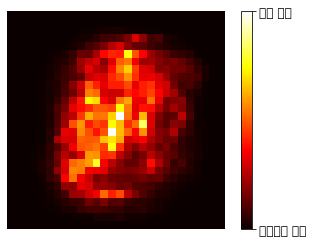

In [21]:
#중요도 출력

plot_digit(rnd_clf.feature_importances_)

#컬러바 생성
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                              rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['중요하지 않음', '매우 중요'])

plt.show()

### 타이타닉 데이터의 생존자 예측 

In [22]:
#pandas 와 seaborn 을 이용하 데이터는 DataFrame 이므로 info 로 정보를 확인

#numpy 를 이용한 데이터는 ndarray 구조
#sklearn 은 data, target, featurenames 속성에 독립변수, 종속변수, 독립변수 의미가 저장되어 있다 

#데이터 가져오기
import seaborn as sns
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
#결측치가 많은 deck 열과 중복된 열인 embark_town 열을 제거 
#다른 데이터의 경우 상관 계수도 파악을 해서 상관 관계가 너무 높은 데이터가 
#존재하면 지우는 것도 고려 
rdf = df.drop(['deck', 'embark_town'], axis =1)

#결측치가 아주 많지 않은 age의 데이터는 결측치를 삭제
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

#결측치 대체 - 가장 많이 등장한 값으로 대체 
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

df.info()
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data co

In [30]:
#분석에 사용할 열 만 추출
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [31]:
#원 핫 인코딩
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

#데이터 앞에 Town을 추가하여 원핫 인코딩 
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     714 non-null    int64  
 4   parch     714 non-null    int64  
 5   female    714 non-null    uint8  
 6   male      714 non-null    uint8  
 7   town_C    714 non-null    uint8  
 8   town_Q    714 non-null    uint8  
 9   town_S    714 non-null    uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 37.0 KB


In [32]:
# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = forest.predict(X_test) 

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)

[0 0 1 0 0 1 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[106  19]
 [ 27  63]]


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       125
           1       0.77      0.70      0.73        90

    accuracy                           0.79       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.78      0.79      0.78       215



(-1.0, 9.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

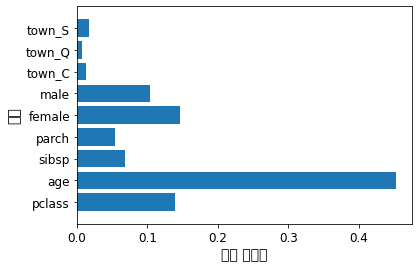

In [33]:
n_features = X.data.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S'])
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)

### RandomForest 를 이용한 집 값 예측

In [20]:
from sklearn.datasets import load_boston

boston = load_boston()
#피처 데이터의 항목 이름 확인
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [21]:
#데이터를 확인하거나 전처리를 수행한 후 설명을 할 때는 ndarray 보다는
#DataFrame 이 수월함
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [22]:
#피처 데이터와 타겟 데이터 생성
X_feature = bostonDF['RM'].values.reshape(-1,1)
y_target = bostonDF['PRICE'].values.reshape(-1,1)

In [14]:
#회귀 모델 생성
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor(n_estimators=1000, random_state=42)

In [23]:
#교차 검증
from sklearn.model_selection import cross_val_score

#5겹 교차 검증
neg_mse_scores = cross_val_score(rf, X_feature, y_target,
                                 scoring='neg_mean_squared_error',
                                 cv=5)

#이 값은 큰게 좋음 
print("교차 검증 점수:", neg_mse_scores)

#잔차의 제곱 의 합의 제곱근 - rmse
rmse_scores = np.sqrt(-1 * neg_mse_scores)
print("RMSE:", neg_mse_scores)

#교차 검증시 RMSE의 평균값
avg_rmse = np.mean(rmse_scores)
print("RMSE 평균:", avg_rmse)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

교차 검증 점수: [-26.28607064 -39.65382315 -45.20532478 -90.33664476 -69.78493246]
RMSE: [-26.28607064 -39.65382315 -45.20532478 -90.33664476 -69.78493246]
RMSE 평균: 7.201181957287375


## Boosting
### AdaBoost

In [24]:
from pandas.core.common import random_state
#비선형 데이터 생성
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier
# 모델 생성 및 훈련 
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                             n_estimators=200,
                             algorithm = "SAMME.R",
                             learning_rate=0.5,
                             random_state=42)
ada_clf.fit(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=200, random_state=42)

## GradientBoostring
### moons 데이터에 GBM 적용

In [26]:
#비선형 데이터 생성
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn import metrics 

X, y = make_moons(n_samples = 500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#모델 생성
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)
import time
#모델이 훈련하기 전의 시간 저장 
start_time = time.time()

gb_clf.fit(X_train, y_train)

#모델이 훈련을 종료한 시간 저장
end_time = time.time()

#예측
gb_pred = gb_clf.predict(X_test)

#정확도 확인
print("정확도 : ", metrics.accuracy_score(y_test, gb_pred))
#훈련 시간 확인
print("훈련시간 : ", (end_time -start_time))

정확도 :  0.888
훈련시간 :  0.20457124710083008


### 하이퍼 파라미터 튜닝 - 최적의 하이퍼 파라미터 찾기

In [27]:
from distutils import version
from sklearn.model_selection import GridSearchCV

#확인할 하이퍼 파라미터 조합을 생성
params = {
    'n_estimators' : [100,50],
    'learning_rate' : [0.05,1]
}

#하이퍼 파라미터 튜닝 시작
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

#최적의 하이퍼 파라미터 값이 최소값이나 최대값인 경우는
#값을 조금 더 올리거나 내려서 수행을 더 해봐야 한다
print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_)
print("최적의 정확도 : ", grid_cv.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적의 하이퍼 파라미터 :  {'learning_rate': 0.05, 'n_estimators': 100}
최적의 정확도 :  0.8960063716008647


### XGBoost


In [28]:
#데이터 가져오기
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X_features = dataset.data
y_target = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns=dataset.feature_names)
cancer_df['target'] = y_target
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
#타겟 이름 확인
print(dataset.target_names)
#malignant : 악성
#benign : 악성이 아닌 

['malignant' 'benign']


In [30]:
#샘플의 클래스 비율 확인
print(cancer_df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


In [31]:
#학습 데이터 와 훈련 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [32]:
#XGB 를 위한 데이터 생성
import xgboost as xgb

#내부적으로 교차 검증을 수행하기 때문에 데이터 구조가 다름
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [33]:
#XGB를 위한 하이퍼 파라미터 생성
params = {'max_depth' : 3, 'eta':0.1, 'objective' : 'binary:logistic',
          'eval_metric':'logloss'}
    
num_rounds = 400

In [34]:
#분류기 생성
wlist = [(dtrain,'train'), (dtest, 'eval')]
#훈련
xgb_model = xgb.train(params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100,
                      evals=wlist)

[0]	train-logloss:0.609607	eval-logloss:0.614431
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540756	eval-logloss:0.547208
[2]	train-logloss:0.484074	eval-logloss:0.495586
[3]	train-logloss:0.433242	eval-logloss:0.446594
[4]	train-logloss:0.389846	eval-logloss:0.406819
[5]	train-logloss:0.352125	eval-logloss:0.370823
[6]	train-logloss:0.319491	eval-logloss:0.340322
[7]	train-logloss:0.291385	eval-logloss:0.315586
[8]	train-logloss:0.266061	eval-logloss:0.291813
[9]	train-logloss:0.243922	eval-logloss:0.27323
[10]	train-logloss:0.224081	eval-logloss:0.254899
[11]	train-logloss:0.206975	eval-logloss:0.242168
[12]	train-logloss:0.191283	eval-logloss:0.225769
[13]	train-logloss:0.177047	eval-logloss:0.212827
[14]	train-logloss:0.16451	eval-logloss:0.199469
[15]	train-logloss:0.153192	eval-logloss:0.191687
[16]	train-logloss:0.14312	eval-logloss:0.180686
[17]	train-lo

In [35]:
#예측
pred_probs = xgb_model.predict(dtest)
#확률 출력
print(np.round(pred_probs[:10], 3))

[0.995 0.    0.    1.    1.    0.    0.001 0.065 0.346 1.   ]


In [36]:
#확률을 0.5를 기준으로 예측 값을 결정
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print(preds[:10])
print(y_test[:10])

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1 0 0 1 1 0 0 0 1 1]


In [37]:
#평가 지표 확인
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

print('오차 행렬 :', confusion_matrix(y_test, preds))
print('정확도 :', accuracy_score(y_test, preds))
print('정밀도 :', precision_score(y_test, preds))
print('재현율 :', recall_score(y_test, preds))
print('f1_score :', f1_score(y_test, preds))
print('roc_auc_score :', roc_auc_score(y_test, preds))


오차 행렬 : [[41  2]
 [ 1 70]]
정확도 : 0.9736842105263158
정밀도 : 0.9722222222222222
재현율 : 0.9859154929577465
f1_score : 0.979020979020979
roc_auc_score : 0.969701932525385


### Light(LGBM)를 유방암 데이터 분류

In [38]:
#모델 생성
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400)


In [39]:
#평가 데이터를 설정하고 모델 훈련
evals = [(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                 eval_metric='logloss', eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.587533	valid_0's binary_logloss: 0.587533
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.52449	valid_0's binary_logloss: 0.52449
[3]	valid_0's binary_logloss: 0.472657	valid_0's binary_logloss: 0.472657
[4]	valid_0's binary_logloss: 0.432004	valid_0's binary_logloss: 0.432004
[5]	valid_0's binary_logloss: 0.391511	valid_0's binary_logloss: 0.391511
[6]	valid_0's binary_logloss: 0.357212	valid_0's binary_logloss: 0.357212
[7]	valid_0's binary_logloss: 0.329036	valid_0's binary_logloss: 0.329036
[8]	valid_0's binary_logloss: 0.302392	valid_0's binary_logloss: 0.302392
[9]	valid_0's binary_logloss: 0.281315	valid_0's binary_logloss: 0.281315
[10]	valid_0's binary_logloss: 0.26363	valid_0's binary_logloss: 0.26363
[11]	valid_0's binary_logloss: 0.247288	valid_0's binary_logloss: 0.247288
[12]	valid_0's binary_logloss: 0.228944	valid_0's binary_logloss: 0.228944
[13]	valid_0's binary_logloss: 0.216059	valid_0's 

LGBMClassifier(n_estimators=400)

In [40]:
#예측
preds = lgbm_wrapper.predict(X_test)
preds_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
print(preds[:10])
print(preds_proba[:10])
print(y_test[:10])

[1 0 0 1 1 0 0 0 0 1]
[0.99442998 0.00111938 0.00199303 0.99835782 0.99924921 0.00137833
 0.00111842 0.11109571 0.12759447 0.99825783]
[1 0 0 1 1 0 0 0 1 1]


In [41]:
#평가 지표 확인
print('오차 행렬 :', confusion_matrix(y_test, preds))
print('정확도 :', accuracy_score(y_test, preds))
print('정밀도 :', precision_score(y_test, preds))
print('재현율 :', recall_score(y_test, preds))
print('f1_score :', f1_score(y_test, preds))
print('roc_auc_score :', roc_auc_score(y_test, preds))

오차 행렬 : [[41  2]
 [ 2 69]]
정확도 : 0.9649122807017544
정밀도 : 0.971830985915493
재현율 : 0.971830985915493
f1_score : 0.971830985915493
roc_auc_score : 0.9626596790042582


## 스태킹

In [53]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

#print(X_train.shape)
#print(X_test.shape)
#훈련 데이터와 테스트 데이터 분할
X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=42)


#모델 생성 
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#개별 모델을 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100)

#Stacking 모델
lr_final = LogisticRegression(C=10)

#개별 모델 훈련
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

#개별 모델의 정확도 확인
from sklearn.metrics import accuracy_score

#예측
knn_pred = knn_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도 :', accuracy_score(y_test, knn_pred))
print('DT 정확도 :', accuracy_score(y_test, dt_pred))
print('RF 정확도 :', accuracy_score(y_test, rf_pred))
print('ADA 정확도 :', accuracy_score(y_test, ada_pred))

#스태킹 모델을 사용하기 위한 데이터 생성 
pred=np.array([knn_pred, dt_pred, rf_pred, ada_pred]) #예측한 것을 모아옴
print(pred.shape)
#행과 열을 바꿔서
pred = np.transpose(pred)
print(pred.shape)

#최종 모델로 훈련
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print("최종 모델 정확도 : ", accuracy_score(y_test, final))

KNN 정확도 : 0.956140350877193
DT 정확도 : 0.9385964912280702
RF 정확도 : 0.9649122807017544
ADA 정확도 : 0.9736842105263158
(4, 114)
(114, 4)
최종 모델 정확도 :  0.9824561403508771
